In [2]:
import tensorflow as tf

In [3]:
hello = tf.constant('hello world')

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [5]:
x = tf.constant(100)

In [6]:
type(x)

tensorflow.python.framework.ops.Tensor

In [7]:
x

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [8]:
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [9]:
sess = tf.Session()

In [10]:
sess.run(hello)

b'hello world'

In [12]:
sess.run(x)

100

In [13]:
x = tf.constant(2)

In [14]:
y = tf.constant(3)

In [15]:
z = x+y

In [21]:
with tf.Session() as sess:
    print(sess.run(x+y))

5


In [22]:
x = tf.placeholder(tf.int32)

In [23]:
y = tf.placeholder(tf.int32)

In [24]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [25]:
add = tf.add(x,y)

In [26]:
with tf.Session() as sess:
    print(sess.run(add,feed_dict={x:20,y:30}))

50


In [27]:
import numpy as np

In [28]:
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [29]:
a

array([[5., 5.]])

In [30]:
b

array([[2.],
       [2.]])

In [31]:
a.shape

(1, 2)

In [32]:
b.shape

(2, 1)

In [33]:
mat1 = tf.constant(a)

In [34]:
mat2 = tf.constant(b)

In [35]:
matrix_mul = tf.matmul(mat1,mat2)

In [38]:
with tf.Session() as sess:
    print(sess.run(matrix_mul))

[[20.]]


# Mnist with Multi-Layer Perception

In [45]:
import tensorflow as tf


In [46]:
from tensorflow.examples.tutorials.mnist import input_data

In [47]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [48]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [49]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
sample = mnist.train.images[9].reshape(28,28) #28*28 = 784

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

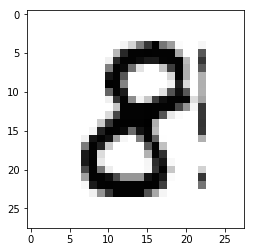

In [70]:
plt.imshow(sample,cmap='Greys')

In [112]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [61]:
n_classes = 10
n_samples = mnist.train.num_examples

In [62]:
n_input = 784

In [64]:
n_hidden_1 = 256
n_hidden_2 = 256

In [80]:
def multilayer_perceptron(x,weight,biases):
    #x placelholder
    #weight dict of weight
    #bias dict of bias values
    #first hidden layer with RELU Activation 
    #X * W + B
    layer_1 = tf.add(tf.matmul(x,weight['h1']),biases['b1'])
    #RELU(X * W + B) = RELU ->f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weight['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #last output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [81]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [82]:
weights

{'h1': <tf.Variable 'Variable_7:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_8:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_9:0' shape=(256, 10) dtype=float32_ref>}

In [83]:
biases= {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [84]:
x = tf.placeholder('float',[None,n_input])

In [85]:
y = tf.placeholder('float',[None,n_classes])

In [87]:
pred = multilayer_perceptron(x,weights,biases)

In [94]:
# use logits parameter for prediction and labels for y

In [93]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [100]:
t = mnist.train.next_batch(1)

In [102]:
xsamp,ysamp = t

In [103]:
xsamp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

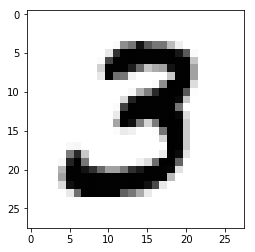

In [106]:
plt.imshow(xsamp.reshape(28,28),cmap='Greys')

In [107]:
ysamp

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [108]:
sess = tf.InteractiveSession()

In [109]:
init = tf.initialize_all_variables()

In [110]:
sess.run(init)

In [115]:
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost +=c/total_batch
    print('epoch: {} cost{:.4f}'.format(epoch+1,avg_cost))
print("model has completed {} epochs of training".format(training_epochs))

epoch: 1 cost228.1607
epoch: 2 cost45.7862
epoch: 3 cost28.6214
epoch: 4 cost19.8523
epoch: 5 cost14.4371
epoch: 6 cost10.9353
epoch: 7 cost8.2199
epoch: 8 cost6.2504
epoch: 9 cost4.7555
epoch: 10 cost3.7218
epoch: 11 cost2.6113
epoch: 12 cost2.0164
epoch: 13 cost1.5440
epoch: 14 cost1.1489
epoch: 15 cost0.9351
model has completed 15 epochs of training


In [117]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [118]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [119]:
correct_predictions = tf.cast(correct_predictions,'float')

In [120]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [121]:
accuracy = tf.reduce_mean(correct_predictions)

In [122]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [127]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [126]:
mnist.test.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [128]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9375

# ContribLearn (joining sklearn with tf)

In [129]:
from sklearn.datasets import load_iris

In [130]:
iris = load_iris()

In [131]:
X = iris['data']
y = iris['target']

In [132]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
y.dtype

dtype('int32')

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [141]:
import tensorflow.contrib.learn.python.learn as learn

In [ ]:
#You need to pass correct arguments tf.contrib.learn.DNNClassifier, here you
#didn't passfeature_columns argument.

#For example, you can use real_valued_column as features_columns

In [145]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]

classifier = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10],n_classes=3)

In [146]:
classifier.fit(X_train,y_train,steps=200,batch_size=32)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000002872AE65C18>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=1, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x0000028716EBDD90>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [170]:
iris_predictions = classifier.predict(X_test)

In [171]:
a = list(iris_predictions)

In [175]:
predi = np.asarray(a)

In [176]:
predi

array([2, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1,
       0], dtype=int64)

In [178]:
from sklearn.metrics import classification_report,confusion_matrix

In [179]:
print(confusion_matrix(y_test,predi))
print(classification_report(y_test,predi))

[[17  0  0]
 [ 0 17  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        18
           2       0.91      1.00      0.95        10

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

